# Importing Libraries to be used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading data into the working environment

In [2]:
hr_data = pd.read_csv('HRDataset_v9.csv')
pd.set_option('display.max_columns', None)
hr_data.head()

,Employee Name,Employee Number,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Pay Rate,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1103024456,1,1,0,1,1,3,30,28.50,MA,1450,11/24/1987,Female,Married,US Citizen,No,Black or African American,10/27/2008,3317,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,23.00,MA,1460,4/26/1984,Male,Divorced,US Citizen,No,Black or African American,1/6/2014,1420,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,29.00,MA,2703,9/1/1986,Male,Single,US Citizen,No,White,9/29/2014,1154,NaN,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,21.50,MA,2170,9/16/1985,Female,Married,US Citizen,No,White,2/16/2015,58,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1307059817,0,0,0,1,1,9,30,16.56,MA,2330,5/19/1988,Female,Single,US Citizen,No,White,5/1/2015,940,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


# EDA

In [3]:
hr_data.shape

(310, 28)

In [4]:
hr_data.isna().sum()

Employee Name            0
Employee Number          0
MarriedID                0
MaritalStatusID          0
GenderID                 0
EmpStatus_ID             0
DeptID                   0
Perf_ScoreID             0
Age                      0
Pay Rate                 0
State                    0
Zip                      0
DOB                      0
Sex                      0
MaritalDesc              0
CitizenDesc              0
Hispanic/Latino          0
RaceDesc                 0
Date of Hire             0
Days Employed            0
Date of Termination    207
Reason For Term          0
Employment Status        0
Department               0
Position                 0
Manager Name             0
Employee Source          0
Performance Score        0
dtype: int64

In [5]:
hr_data.duplicated().sum()

0

In [6]:
employee_plot = hr_data[['Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 
                         'Department', 'Employee Source', 'Employment Status']]
employee_plot['Employment Status']= (employee_plot['Employment Status']
                                     .apply(lambda x: 1 if x in ['Voluntarily Terminated','Terminated for Cause'] else 0))

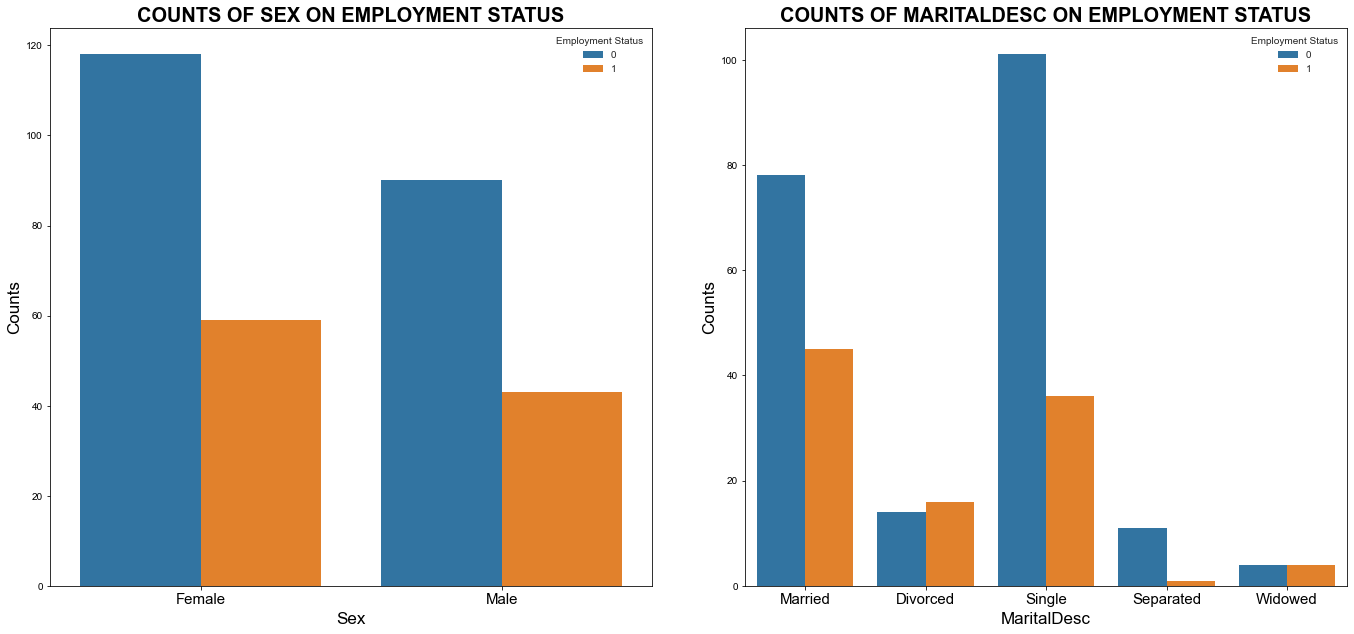

In [7]:
cols = ['Sex', 'MaritalDesc']

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
for col, axes in zip(cols, ax.flatten()):
    plt.style.use('seaborn-darkgrid')
    sns.countplot(data=employee_plot, x=col, hue='Employment Status', ax=axes)
    axes.set_xticklabels(employee_plot[col].unique(), fontsize=15)
    axes.set_title(f'COUNTS OF {col.upper()} ON EMPLOYMENT STATUS', fontsize=20, fontweight='bold')
    axes.set_xlabel(f'{col}', fontsize=17, labelpad=5)
    axes.set_ylabel('Counts', fontsize=17)
    axes.legend(loc=1, title='Employment Status', fontsize=10)
    fig.tight_layout(pad=5);

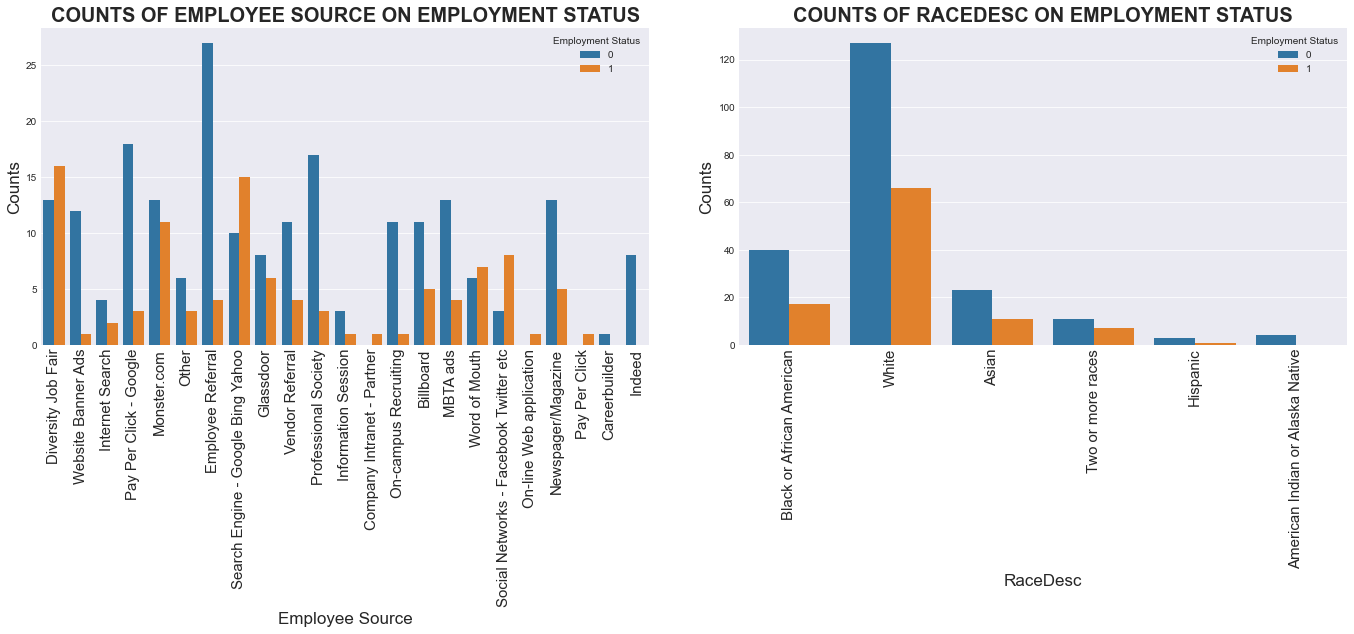

In [8]:
cols = ['Employee Source', 'RaceDesc']

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
for col, axes in zip(cols, ax.flatten()):
    plt.style.use('seaborn-darkgrid')
    sns.countplot(data=employee_plot, x=col, hue='Employment Status', ax=axes)
    axes.set_xticklabels(employee_plot[col].unique(), fontsize=15, rotation=90)
    axes.set_title(f'COUNTS OF {col.upper()} ON EMPLOYMENT STATUS', fontsize=20, fontweight='bold')
    axes.set_xlabel(f'{col}', fontsize=17, labelpad=5)
    axes.set_ylabel('Counts', fontsize=17)
    axes.legend(loc=1, title='Employment Status', fontsize=10)
    fig.tight_layout(pad=5);

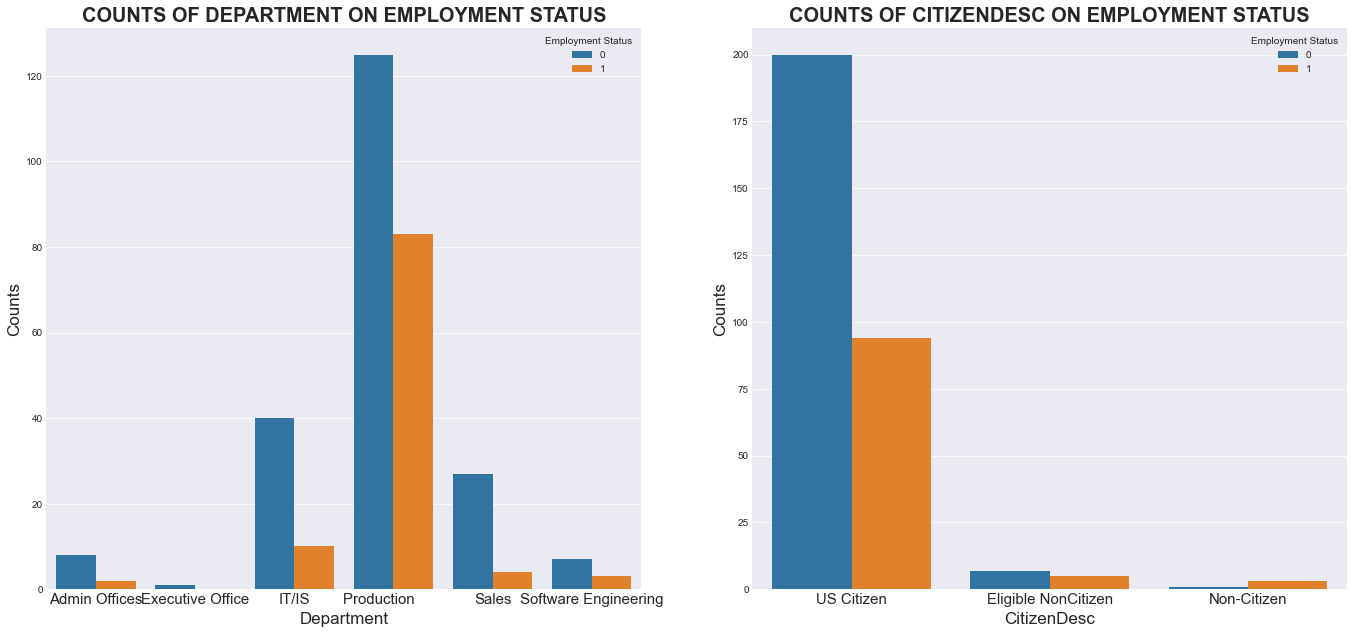

In [9]:
cols = ['Department', 'CitizenDesc']

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
for col, axes in zip(cols, ax.flatten()):
    plt.style.use('seaborn-darkgrid')
    sns.countplot(data=employee_plot, x=col, hue='Employment Status', ax=axes)
    axes.set_xticklabels(employee_plot[col].unique(), fontsize=15)
    axes.set_title(f'COUNTS OF {col.upper()} ON EMPLOYMENT STATUS', fontsize=20, fontweight='bold')
    axes.set_xlabel(f'{col}', fontsize=17, labelpad=5)
    axes.set_ylabel('Counts', fontsize=17)
    axes.legend(loc=1, title='Employment Status', fontsize=10)
    fig.tight_layout(pad=5);

In [12]:
Term = hr_data['Reason For Term'].value_counts()
Term

N/A - still employed                197
Another position                     20
unhappy                              14
more money                           11
N/A - Has not started yet            11
hours                                 9
career change                         9
attendance                            7
relocation out of area                5
return to school                      5
military                              4
retiring                              4
performance                           4
medical issues                        3
no-call, no-show                      3
maternity leave - did not return      3
gross misconduct                      1
Name: Reason For Term, dtype: int64

In [13]:
Term = Term.drop(['N/A - still employed', 'N/A - Has not started yet'], 0)
Term

Another position                    20
unhappy                             14
more money                          11
hours                                9
career change                        9
attendance                           7
relocation out of area               5
return to school                     5
military                             4
retiring                             4
performance                          4
medical issues                       3
no-call, no-show                     3
maternity leave - did not return     3
gross misconduct                     1
Name: Reason For Term, dtype: int64

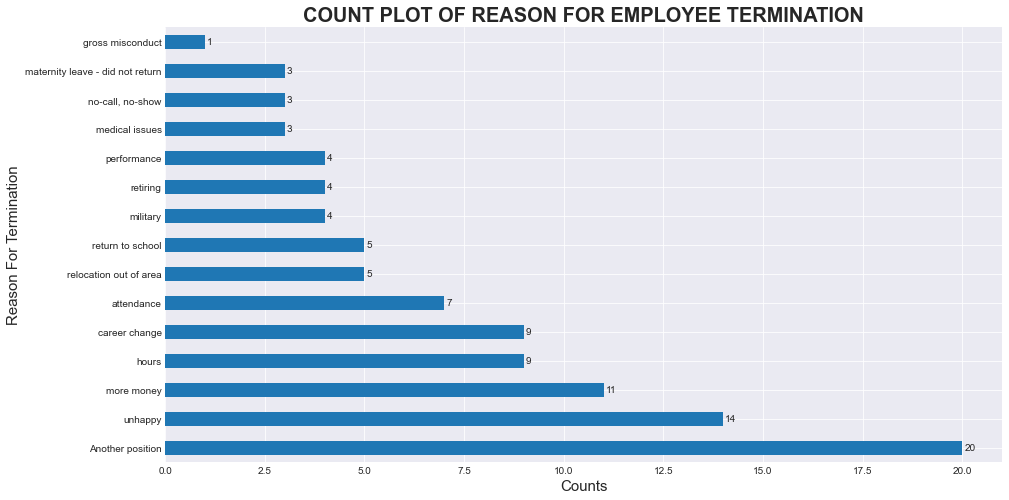

In [14]:
Term.plot(kind='barh', figsize=(15, 8))
plt.ylabel('Reason For Termination', fontsize=15)
plt.xlabel('Counts', fontsize=15)
plt.title('COUNT PLOT OF REASON FOR EMPLOYEE TERMINATION', fontweight='bold', fontsize=20)
for i, value in zip(range(len(Term)), Term.values):
    plt.text(value+0.05, i, '%d'%value, ha='left', va='center', fontsize=10)

# Relevant features needed to be considered for the model

> The features selected to be considered and relevant to building the models are;

* MaritalDesc (emcoded as MaritalStatusID)
* MarriedID               
* Sex (encoded as GenderID)
* Department (encoded as DeptID)
* Performance Score (encoded as Perf_ScoreID)
* Age
* Pay Rate
* CitizenDesc
* Hispanic/Latino
* RaceDesc
* Days Employed
* Position
* Manager Name
* Employee Source
> Target variable
* Employment Status 

In [15]:
data = hr_data[['MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'Perf_ScoreID',
                'Age', 'Pay Rate', 'Days Employed','CitizenDesc', 'Hispanic/Latino', 'RaceDesc', 
              'Position', 'Manager Name', 'Employee Source','Employment Status']]
data.head()

,MarriedID,MaritalStatusID,GenderID,DeptID,Perf_ScoreID,Age,Pay Rate,Days Employed,CitizenDesc,Hispanic/Latino,RaceDesc,Position,Manager Name,Employee Source,Employment Status
0,1,1,0,1,3,30,28.50,3317,US Citizen,No,Black or African American,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Active
1,0,2,1,1,3,34,23.00,1420,US Citizen,No,Black or African American,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Active
2,0,0,1,1,3,31,29.00,1154,US Citizen,No,White,Accountant I,Brandon R. LeBlanc,Internet Search,Active
3,1,1,0,1,9,32,21.50,58,US Citizen,No,White,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,Active
4,0,0,0,1,9,30,16.56,940,US Citizen,No,White,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,Active


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MarriedID          310 non-null    int64  
 1   MaritalStatusID    310 non-null    int64  
 2   GenderID           310 non-null    int64  
 3   DeptID             310 non-null    int64  
 4   Perf_ScoreID       310 non-null    int64  
 5   Age                310 non-null    int64  
 6   Pay Rate           310 non-null    float64
 7   Days Employed      310 non-null    int64  
 8   CitizenDesc        310 non-null    object 
 9   Hispanic/Latino    310 non-null    object 
 10  RaceDesc           310 non-null    object 
 11  Position           310 non-null    object 
 12  Manager Name       310 non-null    object 
 13  Employee Source    310 non-null    object 
 14  Employment Status  310 non-null    object 
dtypes: float64(1), int64(7), object(7)
memory usage: 36.5+ KB


In [17]:
data.shape

(310, 15)

# Data Preparation

## Encoding features in the relevant data

> Applying the One Hot Encoder method here, using the `pd.get_dummies()` method<br>
> Using `ordinal encoder` for the variable *CitizenDesc and Hispanic/Latino*

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
columns = ['RaceDesc', 'Position', 'Manager Name', 'Employee Source']
data_encoded = pd.get_dummies(data=data, columns=columns)
data_encoded.head()

,MarriedID,MaritalStatusID,GenderID,DeptID,Perf_ScoreID,Age,Pay Rate,Days Employed,CitizenDesc,Hispanic/Latino,Employment Status,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,Position_Accountant I,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Architect,Position_Database Administrator,Position_Director of Operations,Position_Director of Sales,Position_IT Director,Position_IT Manager - DB,Position_IT Manager - Infra,Position_IT Manager - Support,Position_IT Support,Position_Network Engineer,Position_President & CEO,Position_Production Manager,Position_Production Technician I,Position_Production Technician II,Position_Sales Manager,Position_Senior BI Developer,Position_Shared Services Manager,Position_Software Engineer,Position_Software Engineering Manager,Position_Sr. Accountant,Position_Sr. DBA,Position_Sr. Network Engineer,Manager Name_Alex Sweetwater,Manager Name_Amy Dunn,Manager Name_Board of Directors,Manager Name_Brandon R. LeBlanc,Manager Name_Brannon Miller,Manager Name_Brian Champaigne,Manager Name_David Stanley,Manager Name_Debra Houlihan,Manager Name_Elijiah Gray,Manager Name_Eric Dougall,Manager Name_Janet King,Manager Name_Jennifer Zamora,Manager Name_John Smith,Manager Name_Kelley Spirea,Manager Name_Ketsia Liebig,Manager Name_Kissy Sullivan,Manager Name_Lynn Daneault,Manager Name_Michael Albert,Manager Name_Peter Monroe,Manager Name_Simon Roup,Manager Name_Webster Butler,Employee Source_Billboard,Employee Source_Careerbuilder,Employee Source_Company Intranet - Partner,Employee Source_Diversity Job Fair,Employee Source_Employee Referral,Employee Source_Glassdoor,Employee Source_Indeed,Employee Source_Information Session,Employee Source_Internet Search,Employee Source_MBTA ads,Employee Source_Monster.com,Employee Source_Newspager/Magazine,Employee Source_On-campus Recruiting,Employee Source_On-line Web application,Employee Source_Other,Employee Source_Pay Per Click,Employee Source_Pay Per Click - Google,Employee Source_Professional Society,Employee Source_Search Engine - Google Bing Yahoo,Employee Source_Social Networks - Facebook Twitter etc,Employee Source_Vendor Referral,Employee Source_Website Banner Ads,Employee Source_Word of Mouth
0,1,1,0,1,3,30,28.50,3317,US Citizen,No,Active,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,1,1,3,34,23.00,1420,US Citizen,No,Active,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,3,31,29.00,1154,US Citizen,No,Active,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,9,32,21.50,58,US Citizen,No,Active,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,9,30,16.56,940,US Citizen,No,Active,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [20]:
data['CitizenDesc'].value_counts()

US Citizen             294
Eligible NonCitizen     12
Non-Citizen              4
Name: CitizenDesc, dtype: int64

In [21]:
data['Hispanic/Latino'].value_counts()

No     281
Yes     27
yes      1
no       1
Name: Hispanic/Latino, dtype: int64

In [22]:
data.loc[:, 'Hispanic/Latino'] = data['Hispanic/Latino'].apply(lambda x: x.lower())
data['Hispanic/Latino'].value_counts()

no     282
yes     28
Name: Hispanic/Latino, dtype: int64

In [23]:
encode = OrdinalEncoder()

ordinal_feat = ['CitizenDesc', 'Hispanic/Latino']
me = encode.fit_transform(data[ordinal_feat])

encode.categories_

[array(['Eligible NonCitizen', 'Non-Citizen', 'US Citizen'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [24]:
data_encoded[ordinal_feat] = me
for cols in ordinal_feat:
    print(data[cols].value_counts(), '\n')

US Citizen             294
Eligible NonCitizen     12
Non-Citizen              4
Name: CitizenDesc, dtype: int64 

no     282
yes     28
Name: Hispanic/Latino, dtype: int64 



In [25]:
data_encoded.shape

(310, 89)

In [26]:
data_encoded.head()

,MarriedID,MaritalStatusID,GenderID,DeptID,Perf_ScoreID,Age,Pay Rate,Days Employed,CitizenDesc,Hispanic/Latino,Employment Status,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,Position_Accountant I,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Architect,Position_Database Administrator,Position_Director of Operations,Position_Director of Sales,Position_IT Director,Position_IT Manager - DB,Position_IT Manager - Infra,Position_IT Manager - Support,Position_IT Support,Position_Network Engineer,Position_President & CEO,Position_Production Manager,Position_Production Technician I,Position_Production Technician II,Position_Sales Manager,Position_Senior BI Developer,Position_Shared Services Manager,Position_Software Engineer,Position_Software Engineering Manager,Position_Sr. Accountant,Position_Sr. DBA,Position_Sr. Network Engineer,Manager Name_Alex Sweetwater,Manager Name_Amy Dunn,Manager Name_Board of Directors,Manager Name_Brandon R. LeBlanc,Manager Name_Brannon Miller,Manager Name_Brian Champaigne,Manager Name_David Stanley,Manager Name_Debra Houlihan,Manager Name_Elijiah Gray,Manager Name_Eric Dougall,Manager Name_Janet King,Manager Name_Jennifer Zamora,Manager Name_John Smith,Manager Name_Kelley Spirea,Manager Name_Ketsia Liebig,Manager Name_Kissy Sullivan,Manager Name_Lynn Daneault,Manager Name_Michael Albert,Manager Name_Peter Monroe,Manager Name_Simon Roup,Manager Name_Webster Butler,Employee Source_Billboard,Employee Source_Careerbuilder,Employee Source_Company Intranet - Partner,Employee Source_Diversity Job Fair,Employee Source_Employee Referral,Employee Source_Glassdoor,Employee Source_Indeed,Employee Source_Information Session,Employee Source_Internet Search,Employee Source_MBTA ads,Employee Source_Monster.com,Employee Source_Newspager/Magazine,Employee Source_On-campus Recruiting,Employee Source_On-line Web application,Employee Source_Other,Employee Source_Pay Per Click,Employee Source_Pay Per Click - Google,Employee Source_Professional Society,Employee Source_Search Engine - Google Bing Yahoo,Employee Source_Social Networks - Facebook Twitter etc,Employee Source_Vendor Referral,Employee Source_Website Banner Ads,Employee Source_Word of Mouth
0,1,1,0,1,3,30,28.50,3317,2.0,0.0,Active,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,1,1,3,34,23.00,1420,2.0,0.0,Active,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,3,31,29.00,1154,2.0,0.0,Active,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,9,32,21.50,58,2.0,0.0,Active,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,9,30,16.56,940,2.0,0.0,Active,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Encoding the target variable

> Of all classes in the target varible, Employment Status. Our positive class (1) would be `Voluntarily Terminated` and `Terminated for Cause`. The rest would represent negative class (0).

In [27]:
data_encoded['Employment Status'].unique()

array(['Active', 'Voluntarily Terminated', 'Terminated for Cause',
       'Leave of Absence', 'Future Start'], dtype=object)

In [28]:
data_encoded['Employment Status'].value_counts()

Active                    183
Voluntarily Terminated     88
Leave of Absence           14
Terminated for Cause       14
Future Start               11
Name: Employment Status, dtype: int64

In [29]:
# function to encode the target variables into 1's and 0's as discussed earlier

def target(status):
    if status == 'Voluntarily Terminated' or status == 'Terminated for Cause':
        return 1
    else:
        return 0

In [30]:
data_encoded['Employment Status'] = data_encoded['Employment Status'].apply(target)
data_encoded['Employment Status'].value_counts()

0    208
1    102
Name: Employment Status, dtype: int64

In [31]:
data_encoded.head()

,MarriedID,MaritalStatusID,GenderID,DeptID,Perf_ScoreID,Age,Pay Rate,Days Employed,CitizenDesc,Hispanic/Latino,Employment Status,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,Position_Accountant I,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Architect,Position_Database Administrator,Position_Director of Operations,Position_Director of Sales,Position_IT Director,Position_IT Manager - DB,Position_IT Manager - Infra,Position_IT Manager - Support,Position_IT Support,Position_Network Engineer,Position_President & CEO,Position_Production Manager,Position_Production Technician I,Position_Production Technician II,Position_Sales Manager,Position_Senior BI Developer,Position_Shared Services Manager,Position_Software Engineer,Position_Software Engineering Manager,Position_Sr. Accountant,Position_Sr. DBA,Position_Sr. Network Engineer,Manager Name_Alex Sweetwater,Manager Name_Amy Dunn,Manager Name_Board of Directors,Manager Name_Brandon R. LeBlanc,Manager Name_Brannon Miller,Manager Name_Brian Champaigne,Manager Name_David Stanley,Manager Name_Debra Houlihan,Manager Name_Elijiah Gray,Manager Name_Eric Dougall,Manager Name_Janet King,Manager Name_Jennifer Zamora,Manager Name_John Smith,Manager Name_Kelley Spirea,Manager Name_Ketsia Liebig,Manager Name_Kissy Sullivan,Manager Name_Lynn Daneault,Manager Name_Michael Albert,Manager Name_Peter Monroe,Manager Name_Simon Roup,Manager Name_Webster Butler,Employee Source_Billboard,Employee Source_Careerbuilder,Employee Source_Company Intranet - Partner,Employee Source_Diversity Job Fair,Employee Source_Employee Referral,Employee Source_Glassdoor,Employee Source_Indeed,Employee Source_Information Session,Employee Source_Internet Search,Employee Source_MBTA ads,Employee Source_Monster.com,Employee Source_Newspager/Magazine,Employee Source_On-campus Recruiting,Employee Source_On-line Web application,Employee Source_Other,Employee Source_Pay Per Click,Employee Source_Pay Per Click - Google,Employee Source_Professional Society,Employee Source_Search Engine - Google Bing Yahoo,Employee Source_Social Networks - Facebook Twitter etc,Employee Source_Vendor Referral,Employee Source_Website Banner Ads,Employee Source_Word of Mouth
0,1,1,0,1,3,30,28.50,3317,2.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,1,1,3,34,23.00,1420,2.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,3,31,29.00,1154,2.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,9,32,21.50,58,2.0,0.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,9,30,16.56,940,2.0,0.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Splitting data into features, X and target, y

In [32]:
X = data_encoded.drop('Employment Status', axis=1)
y = data_encoded['Employment Status']

In [33]:
X.shape, y.shape

((310, 88), (310,))

> After encoding and preparing the data for the model, it has 88 columns and 310 rows.

### Feature Scaling

In [34]:
# importing neccessary modules for the feature scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [35]:
# instantiating standard scaler
scaler = StandardScaler()

## Models to be used

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier

# Metrics to be used

In [37]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [38]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.pipeline import make_pipeline

#### Custom function for model training and evaluation

In [39]:
# Building a fucntion that applies SKF to split data, fit data to pipeline, make predictions and evaluate their performance


def model_train_eval(X, y, splits=5, model=None):
    # using an n_splits of 5 garauntees a 80 - 20% train test split with a balanced class for each iteration.
    skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)

    # create lists to store different metric scores from model at each iteration
    train_score = []
    test_score = []
    precision = []
    recall = []
    accuracy = []
    f1_scores = []
    
    # applying SKFold split on data
    for train_index, test_index in skf.split(X, y):
        X_train = X.loc[train_index,:]
        y_train = y[train_index]
        X_test = X.loc[test_index,:]
        y_test = y[test_index]

        # fit pipeline on data
        # pipeline performs feature selection on data then passes selected features to model
        pipe = make_pipeline(scaler, model)
        pipe.fit(X_train, y_train)
        # score model on train set
        train_score.append(pipe.score(X_train, y_train))
        # predict on X_test set
        y_preds = pipe.predict(X_test)
        # score model on test set
        test_score.append(pipe.score(X_test, y_test))
        
        # appending all metric scores to their respective list place holders
        precision.append(precision_score(y_test, y_preds))
        recall.append(recall_score(y_test, y_preds))
        accuracy.append(accuracy_score(y_test, y_preds))
        f1_scores.append(f1_score(y_test, y_preds))
    
    # averaging all metric scores and printing the values.
    print(f'MODEL USED------>{model}')
    print('===================================================================>')
    print(f'Train score: {np.mean(train_score)} (+/- {np.std(train_score)})\n')
    print(f'Test score: {np.mean(test_score)} (+/- {np.std(test_score)})\n')
    print(f'Precision score: {np.mean(precision)} (+/- {np.std(precision)})\n')
    print(f'Recall score: {np.mean(recall)} (+/- {np.std(recall)})\n')
    print(f'Accuracy score: {np.mean(accuracy)} (+/- {np.std(accuracy)})\n')
    print(f'F1 score: {np.mean(f1_scores)} (+/- {np.std(f1_scores)})')

Steps taken in the function above;
> Use StatifiedKFold to split data into train and test splits for 5 folds <br>
> Pass the train set to pipepline, which scales the data using `StandardScaler()` method and then fits chosen model to scaled data<br>
> Predicts on test set using the pipeline<br>
> Evaluate the model with the metrics and stores score in a list.<br>

Repeats this process for the 5 folds and finally returns the average and standard deviation of all scores

# Model building

We will build base models and try to stack them together to improve their performance.

**`Base Models`**
> 1. KNeighbors classifier
> 2. Logistic Regression
> 3. Decision Trees
> 4. Random forest classifier
> 5.Gradient Boosting Classifier

**`Stacked Models`**<br>
We would be trying out different combinations of best performing base models and use 2 simple models as meta classifiers to train on the predictions of the base models.
The two meta classifiers used here are;
> 1. Decision Trees, and 
> 2. Logistic Regression

# Base Models

### KNeighborsClassifier as base model

In [40]:
# instantiating model
knc = KNeighborsClassifier(n_neighbors=5)

# using model_train_eval function to train and evaluate the instantiated model above
model_train_eval(X, y, model=knc)

MODEL USED------>KNeighborsClassifier()
===================================================================>
Train score: 0.771774193548387 (+/- 0.007030482167001081)

Test score: 0.632258064516129 (+/- 0.031275353918814995)

Precision score: 0.4292063492063492 (+/- 0.05948972569139133)

Recall score: 0.3823809523809524 (+/- 0.09218437602800961)

Accuracy score: 0.632258064516129 (+/- 0.031275353918814995)

F1 score: 0.4020415379534107 (+/- 0.07546351870752029)


### Logistic Regression as base model

In [41]:
# instantiating model
log_reg = LogisticRegression(random_state=42, max_iter=200)

# using model_train_eval function to train and evaluate the instantiated model above
model_train_eval(X, y, model=log_reg)

MODEL USED------>LogisticRegression(max_iter=200, random_state=42)
===================================================================>
Train score: 0.9016129032258065 (+/- 0.01129032258064515)

Test score: 0.7806451612903226 (+/- 0.04629903256260428)

Precision score: 0.6607450980392157 (+/- 0.06117048738966713)

Recall score: 0.6966666666666665 (+/- 0.09966610925150701)

Accuracy score: 0.7806451612903226 (+/- 0.04629903256260428)

F1 score: 0.675102493798146 (+/- 0.06788944720568238)


### Decision Trees as base model

In [42]:
# instantiating model
dec_tree = DecisionTreeClassifier(random_state=42)

# using model_train_eval function to train and evaluate the instantiated model above
model_train_eval(X, y, model=dec_tree)

MODEL USED------>DecisionTreeClassifier(random_state=42)
===================================================================>
Train score: 1.0 (+/- 0.0)

Test score: 0.8064516129032258 (+/- 0.020401791355925045)

Precision score: 0.6990964590964591 (+/- 0.01930859689914977)

Recall score: 0.7261904761904762 (+/- 0.08987267385400824)

Accuracy score: 0.8064516129032258 (+/- 0.020401791355925045)

F1 score: 0.7095543205840689 (+/- 0.03983031913310821)


### Random Forest as base model

In [43]:
rfc = RandomForestClassifier(random_state=42)

model_train_eval(X, y, model=rfc)

MODEL USED------>RandomForestClassifier(random_state=42)
===================================================================>
Train score: 1.0 (+/- 0.0)

Test score: 0.829032258064516 (+/- 0.03321171013221614)

Precision score: 0.8648351648351648 (+/- 0.05831428202822681)

Recall score: 0.5695238095238094 (+/- 0.057447600101045264)

Accuracy score: 0.829032258064516 (+/- 0.03321171013221614)

F1 score: 0.6865189712248536 (+/- 0.05971348994074398)


### Gradient Boosting Classifier as base model

In [44]:
gbc = GradientBoostingClassifier(random_state=42, n_estimators=200)

model_train_eval(X, y, model=gbc)

MODEL USED------>GradientBoostingClassifier(n_estimators=200, random_state=42)
===================================================================>
Train score: 1.0 (+/- 0.0)

Test score: 0.8612903225806452 (+/- 0.0129032258064516)

Precision score: 0.8510714285714286 (+/- 0.045910417553201334)

Recall score: 0.7052380952380951 (+/- 0.06398341621873913)

Accuracy score: 0.8612903225806452 (+/- 0.0129032258064516)

F1 score: 0.7683709273182957 (+/- 0.031648162908500865)


# Stacked Models

### Decision Trees as meta classifier

**`Base models:` Decision Trees, Random forest classifier**

In [45]:
# instantiating the model
stack_model = StackingClassifier(classifiers=[dec_tree, rfc],
                                 use_probas=True,
                                 average_probas=True,
                                 meta_classifier=dec_tree)

# using model_train_eval function to train and evaluate the instantiated model above
model_train_eval(X, y, model=stack_model)

MODEL USED------>StackingClassifier(average_probas=True,
                   classifiers=[DecisionTreeClassifier(random_state=42),
                                RandomForestClassifier(random_state=42)],
                   meta_classifier=DecisionTreeClassifier(random_state=42),
                   use_probas=True)
===================================================================>
Train score: 1.0 (+/- 0.0)

Test score: 0.8064516129032258 (+/- 0.020401791355925045)

Precision score: 0.6990964590964591 (+/- 0.01930859689914977)

Recall score: 0.7261904761904762 (+/- 0.08987267385400824)

Accuracy score: 0.8064516129032258 (+/- 0.020401791355925045)

F1 score: 0.7095543205840689 (+/- 0.03983031913310821)


**`Base models:`Logistic Regression, Decision Trees, Random forest classifier**

In [46]:
# instantiating the model
stack_model = StackingClassifier(classifiers=[dec_tree, rfc, log_reg],
                                 use_probas=True,
                                 average_probas=True,
                                 meta_classifier=dec_tree)

# using model_train_eval function to train and evaluate the instantiated model above
model_train_eval(X, y, model=stack_model)

MODEL USED------>StackingClassifier(average_probas=True,
                   classifiers=[DecisionTreeClassifier(random_state=42),
                                RandomForestClassifier(random_state=42),
                                LogisticRegression(max_iter=200,
                                                   random_state=42)],
                   meta_classifier=DecisionTreeClassifier(random_state=42),
                   use_probas=True)
===================================================================>
Train score: 1.0 (+/- 0.0)

Test score: 0.8483870967741935 (+/- 0.038977567656756675)

Precision score: 0.7884736350680622 (+/- 0.048610369136368715)

Recall score: 0.7357142857142858 (+/- 0.08547585886658052)

Accuracy score: 0.8483870967741935 (+/- 0.038977567656756675)

F1 score: 0.7601446761267042 (+/- 0.0641723441585428)


**`Base models:` Logistic Regression, Decision Trees, Random forest classifier, Gradient Boosting Classifier**

In [47]:
# instantiating the model
stack_model = StackingClassifier(classifiers=[dec_tree, rfc, log_reg, gbc],
                                 use_probas=True,
                                 average_probas=True,
                                 meta_classifier=dec_tree)

# using model_train_eval function to train and evaluate the instantiated model above
model_train_eval(X, y, model=stack_model)

MODEL USED------>StackingClassifier(average_probas=True,
                   classifiers=[DecisionTreeClassifier(random_state=42),
                                RandomForestClassifier(random_state=42),
                                LogisticRegression(max_iter=200,
                                                   random_state=42),
                                GradientBoostingClassifier(n_estimators=200,
                                                           random_state=42)],
                   meta_classifier=DecisionTreeClassifier(random_state=42),
                   use_probas=True)
===================================================================>
Train score: 1.0 (+/- 0.0)

Test score: 0.8483870967741935 (+/- 0.02620657549882569)

Precision score: 0.7941752933057281 (+/- 0.05519258854018994)

Recall score: 0.7347619047619048 (+/- 0.08204583642316296)

Accuracy score: 0.8483870967741935 (+/- 0.02620657549882569)

F1 score: 0.7596588007627803 (+/- 0.04707998880761627)


## Logistic Regression as meta classifier

**`Base models:`  Decision Trees, Random forest classifier**

In [48]:
# instantiating the model
stack_model = StackingClassifier(classifiers=[dec_tree, rfc],
                                 use_probas=True,
                                 average_probas=True,
                                 meta_classifier=log_reg)

# using model_train_eval function to train and evaluate the instantiated model above
model_train_eval(X, y, model=stack_model)

MODEL USED------>StackingClassifier(average_probas=True,
                   classifiers=[DecisionTreeClassifier(random_state=42),
                                RandomForestClassifier(random_state=42)],
                   meta_classifier=LogisticRegression(max_iter=200,
                                                      random_state=42),
                   use_probas=True)
===================================================================>
Train score: 1.0 (+/- 0.0)

Test score: 0.8096774193548388 (+/- 0.02580645161290324)

Precision score: 0.7046349206349206 (+/- 0.02050174362242361)

Recall score: 0.7261904761904762 (+/- 0.08987267385400824)

Accuracy score: 0.8096774193548388 (+/- 0.02580645161290324)

F1 score: 0.713032581453634 (+/- 0.04629310818309893)


**`Base models:` Logistic Regression, Decision Trees, Random forest classifier, Gradient Boosting Classifier**

In [49]:
# instantiating the model
stack_model = StackingClassifier(classifiers=[dec_tree, rfc, log_reg, gbc],
                                 use_probas=True,
                                 average_probas=True,
                                 meta_classifier=log_reg)

# using model_train_eval function to train and evaluate the instantiated model above
model_train_eval(X, y, model=stack_model)

MODEL USED------>StackingClassifier(average_probas=True,
                   classifiers=[DecisionTreeClassifier(random_state=42),
                                RandomForestClassifier(random_state=42),
                                LogisticRegression(max_iter=200,
                                                   random_state=42),
                                GradientBoostingClassifier(n_estimators=200,
                                                           random_state=42)],
                   meta_classifier=LogisticRegression(max_iter=200,
                                                      random_state=42),
                   use_probas=True)
===================================================================>
Train score: 1.0 (+/- 0.0)

Test score: 0.8516129032258064 (+/- 0.018809522241436435)

Precision score: 0.8243697478991596 (+/- 0.0607952848661712)

Recall score: 0.7052380952380952 (+/- 0.0477474459432576)

Accuracy score: 0.8516129032258064 (+/- 0.0188095222414

**`Base models:` Decision Trees, Gradient Boosting Classifier**

In [50]:
# instantiating the model
stack_model = StackingClassifier(classifiers=[gbc, dec_tree],
                                 use_probas=True,
                                 average_probas=True,
                                 meta_classifier=log_reg)

# using model_train_eval function to train and evaluate the instantiated model above
model_train_eval(X, y, model=stack_model)

MODEL USED------>StackingClassifier(average_probas=True,
                   classifiers=[GradientBoostingClassifier(n_estimators=200,
                                                           random_state=42),
                                DecisionTreeClassifier(random_state=42)],
                   meta_classifier=LogisticRegression(max_iter=200,
                                                      random_state=42),
                   use_probas=True)
===================================================================>
Train score: 1.0 (+/- 0.0)

Test score: 0.8580645161290322 (+/- 0.025806451612903205)

Precision score: 0.826675579322638 (+/- 0.04448757919654074)

Recall score: 0.7261904761904762 (+/- 0.08987267385400824)

Accuracy score: 0.8580645161290322 (+/- 0.025806451612903205)

F1 score: 0.7690441661173367 (+/- 0.04504029462997738)


**`Base models:`Logistic Regression, Decision Trees, Gradient Boosting Classifier**

In [51]:
# instantiating the model
stack_model = StackingClassifier(classifiers=[dec_tree, gbc, log_reg],
                                 use_probas=True,
                                 average_probas=True,
                                 meta_classifier=log_reg)

# using model_train_eval function to train and evaluate the instantiated model above
model_train_eval(X, y, model=stack_model)

MODEL USED------>StackingClassifier(average_probas=True,
                   classifiers=[DecisionTreeClassifier(random_state=42),
                                GradientBoostingClassifier(n_estimators=200,
                                                           random_state=42),
                                LogisticRegression(max_iter=200,
                                                   random_state=42)],
                   meta_classifier=LogisticRegression(max_iter=200,
                                                      random_state=42),
                   use_probas=True)
===================================================================>
Train score: 1.0 (+/- 0.0)

Test score: 0.8612903225806452 (+/- 0.026206575498825654)

Precision score: 0.8298675833969951 (+/- 0.059448863840285075)

Recall score: 0.7347619047619048 (+/- 0.08204583642316296)

Accuracy score: 0.8612903225806452 (+/- 0.026206575498825654)

F1 score: 0.7754674057410036 (+/- 0.047405646751864504)


**`Base models:` Logistic Regression, Random forest classifier, Gradient Boosting Classifier**

In [52]:
# instantiating the model
stack_model = StackingClassifier(classifiers=[gbc, log_reg, rfc],
                                 use_probas=True,
                                 average_probas=True,
                                 meta_classifier=log_reg)

# using model_train_eval function to train and evaluate the instantiated model above
model_train_eval(X, y, model=stack_model)

MODEL USED------>StackingClassifier(average_probas=True,
                   classifiers=[GradientBoostingClassifier(n_estimators=200,
                                                           random_state=42),
                                LogisticRegression(max_iter=200,
                                                   random_state=42),
                                RandomForestClassifier(random_state=42)],
                   meta_classifier=LogisticRegression(max_iter=200,
                                                      random_state=42),
                   use_probas=True)
===================================================================>
Train score: 0.9967741935483871 (+/- 0.0030174656344951114)

Test score: 0.8516129032258064 (+/- 0.012069862537980446)

Precision score: 0.8359339525283798 (+/- 0.02901100418990542)

Recall score: 0.6866666666666668 (+/- 0.04662291437828309)

Accuracy score: 0.8516129032258064 (+/- 0.012069862537980446)

F1 score: 0.7522619612093295 (

**`Base models:` Decision Trees, Random forest classifier, Gradient Boosting Classifier**

In [53]:
# instantiating the model
stack_model = StackingClassifier(classifiers=[gbc, rfc, dec_tree],
                                 use_probas=True,
                                 average_probas=True,
                                 meta_classifier=log_reg)

# using model_train_eval function to train and evaluate the instantiated model above
model_train_eval(X, y, model=stack_model)

MODEL USED------>StackingClassifier(average_probas=True,
                   classifiers=[GradientBoostingClassifier(n_estimators=200,
                                                           random_state=42),
                                RandomForestClassifier(random_state=42),
                                DecisionTreeClassifier(random_state=42)],
                   meta_classifier=LogisticRegression(max_iter=200,
                                                      random_state=42),
                   use_probas=True)
===================================================================>
Train score: 1.0 (+/- 0.0)

Test score: 0.8612903225806452 (+/- 0.01644845004384768)

Precision score: 0.8562641898864808 (+/- 0.020828283150480083)

Recall score: 0.6961904761904762 (+/- 0.056995842629945455)

Accuracy score: 0.8612903225806452 (+/- 0.01644845004384768)

F1 score: 0.7665085791401579 (+/- 0.032993134697762896)
